# Analytic PNS3 bounds for any number of strata (nz) 

example with 3 strata (3z)

In [3]:
# this makes sure it starts looking for things from the JudeasRx folder down.
import os
import sys
os.chdir('../')
sys.path.insert(0,os.getcwd())
print(os.getcwd())

/home/rrtucci/PycharmProjects/JudeasRx


In [4]:
import pandas as pd
import numpy as np

from Comparer import Comparer

To show how to load Experimental and Observational data from a csv file, we first created one using Pandas

In [5]:

# o1b0 = input_probs[0]# o1b1 = input_probs[1]
# px1 = input_probs[2]
# e1b0 = input_probs[3]
# e1b1 = input_probs[4]
# pz = input_probs[5]

# zname_to_input_probs['a'] = [ .5, .33, .62, .5, .5, .2]
# zname_to_input_probs['b'] = [.37, .62, .71, .5, .5, .3]
# zname_to_input_probs['c'] = [ .2, .5 , .7 , .1, .6, .5]
# alp_y0_y1 = np.array([[.5, -.4], [.2, .1]])

o1b0 = [.5, .37, .2]
o1b1 = [.33, .62, .5]
px1 = [.62, .71, .7]
e1b0 = [.5, .5, .1]
e1b1 = [.5, .5, .6]
pz = [.2, .3, .5]

col_name_to_col_list = {
    'o1b0': o1b0,
    'o1b1': o1b1,
    'px1': px1,
    'e1b0': e1b0,
    'e1b1': e1b1,
    'pz': pz
}

df = pd.DataFrame(col_name_to_col_list,
                  index=['a', 'b', 'c'])
# print("aaaaaaaaaa\n", df)
df.reset_index(inplace=True)
df = df.rename(columns={'index': 'zname'})
# print("bbbbbbbbb\n", df)

# saving the dataframe
df.to_csv('3z_example.csv', index=False)


Next we calculate the PNS3 bounds and plot the.

a:
0.190 <= E_{0|0} <= 0.810
0.415 <= E_{0|1} <= 0.795
0.190 <= E_{1|0} <= 0.810
0.205 <= E_{1|1} <= 0.585
b:
0.183 <= E_{0|0} <= 0.893
0.270 <= E_{0|1} <= 0.560
0.107 <= E_{1|0} <= 0.817
0.440 <= E_{1|1} <= 0.730
c:
0.240 <= E_{0|0} <= 0.940
0.350 <= E_{0|1} <= 0.650
0.060 <= E_{1|0} <= 0.760
0.350 <= E_{1|1} <= 0.650
------------------------------------
Expected ATE, Expected bdoorATE: 0.25 0.191
z name:  probability of z, ATE_z, bdoorATE_z
a: 0.200, 0.000, -0.170
b: 0.300, 0.000, 0.250
c: 0.500, 0.500, 0.300


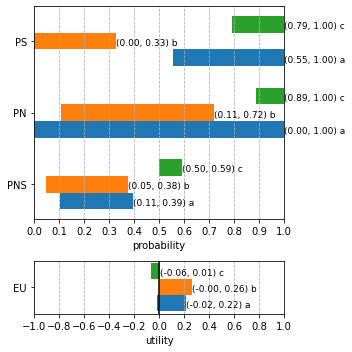

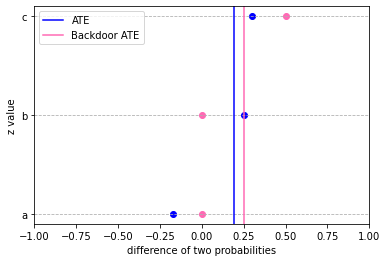

In [6]:

alp_y0_y1 = np.array([[.5, -.4], [.2, .1]])
cer = Comparer.create_from_file('3z_example.csv', 
                                alp_y0_y1=alp_y0_y1,
                                only_obs=False,
                                exogeneity=False,
                                strong_exo=False,
                                monotonicity=False)
cer.plot_bds()
cer.plot_both_ATE()